In [1]:
import pandas as pd
import numpy as np
import plotly as py
import wikipedia
import matplotlib.image as image
import matplotlib.pyplot as plt
from pylab import rcParams
from IPython.display import display, HTML
py.offline.init_notebook_mode()
%matplotlib inline
rcParams['figure.figsize'] = 10, 25

In [2]:
data = pd.read_excel('Summer Olympic medallists 1896 to 2008.xlsx',sheetname='ALL MEDALISTS')
data.columns = data.loc[3]
data = data.loc[4:]
df = data

# History of the Olympics
## A few simple exploratory findings

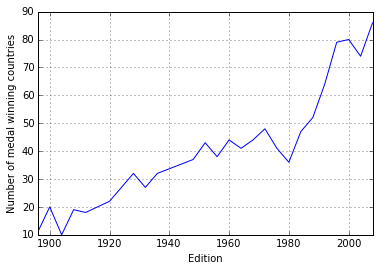

In [357]:
p1 = df.groupby('Edition')['NOC'].nunique().plot()
p1.set_ylabel('Number of medal winning countries')

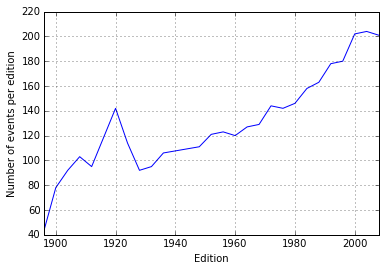

In [358]:
p2 = df.groupby('Edition')['Event'].nunique().plot()
p2.set_ylabel('Number of events per edition')

## Extraordinary Individual Olympians

### First, the guy who won medals in three disciplines
Out of those who won medals in three disciplines, two (Jan Karlsson and Nikolai Kuznetsov) are different athletes with the same names. But this guy is legit. According to Wikipedia:

In [369]:
athlete = data.groupby('Athlete')['Discipline'].nunique()
athlete[athlete>2]

Athlete
KARLSSON, Jan         3
KUNGLER, Frank        3
KUZNETSOV, Nikolai    3
Name: Discipline, dtype: int64

In [365]:
data[data['Athlete']=='KUNGLER, Frank']

3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1098,St Louis,1904,Tug of War,Tug of War,"KUNGLER, Frank",USA,Men,tug of war,M,Bronze
1110,St Louis,1904,Weightlifting,Weightlifting,"KUNGLER, Frank",USA,Men,all-around Dumbbell contest,M,Bronze
1113,St Louis,1904,Weightlifting,Weightlifting,"KUNGLER, Frank",USA,Men,heavyweight - two hand lift,M,Bronze
1121,St Louis,1904,Wrestling,Wrestling Free.,"KUNGLER, Frank",USA,Men,+ 71.67kg (heavyweight),M,Silver


In [421]:
display(HTML(wikipedia.page(pageid=15130826).html().split('References',1)[0]))

### List of athletes who (sort of) won medals in more than 6 editions of Olympics 

In [374]:
ath_year = data.groupby(['Athlete','NOC'])['Edition'].nunique()
ath_year[ath_year>=6]

Athlete           NOC
GEREVICH, Aladar  HUN    6
LIPA, Elisabeta   ROU    6
SZIVOS, Istvan    HUN    7
Name: Edition, dtype: int64

In [378]:
display(data[data['Athlete']=='SZIVOS, Istvan'])
display(data[data['Athlete']=='GEREVICH, Aladar'])
display(data[data['Athlete']=='LIPA, Elisabeta'])

3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
7298,London,1948,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,water polo,M,Silver
8107,Helsinki,1952,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,water polo,M,Gold
8999,Melbourne / Stockholm,1956,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,water polo,M,Gold
11842,Mexico,1968,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,water polo,M,Bronze
12895,Munich,1972,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,water polo,M,Silver
14051,Montreal,1976,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,water polo,M,Gold
15344,Moscow,1980,Aquatics,Water polo,"SZIVOS, Istvan",HUN,Men,water polo,M,Bronze


3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6057,Los Angeles,1932,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre team,M,Gold
6761,Berlin,1936,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre individual,M,Bronze
6771,Berlin,1936,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre team,M,Gold
7646,London,1948,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre individual,M,Gold
7655,London,1948,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre team,M,Gold
8463,Helsinki,1952,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,foil team,M,Bronze
8482,Helsinki,1952,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre individual,M,Silver
8490,Helsinki,1952,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre team,M,Gold
9382,Melbourne / Stockholm,1956,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre team,M,Gold
10299,Rome,1960,Fencing,Fencing,"GEREVICH, Aladar",HUN,Men,sabre team,M,Gold


3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
17673,Los Angeles,1984,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,double sculls (2x),W,Gold
19171,Seoul,1988,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,double sculls (2x),W,Silver
19297,Seoul,1988,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,quadruple sculls without coxswain (4x),W,Bronze
20880,Barcelona,1992,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,double sculls (2x),W,Silver
21005,Barcelona,1992,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,single sculls (1x),W,Gold
22731,Atlanta,1996,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,eight with coxswain (8+),W,Gold
24703,Sydney,2000,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,eight with coxswain (8+),W,Gold
26698,Athens,2004,Rowing,Rowing,"LIPA, Elisabeta",ROU,Women,eight with coxswain (8+),W,Gold


So it appears István Szívós are father and son who jointly dominated the game between 1948 and 1980. Very impressive nonetheless!

In [420]:
display(HTML(wikipedia.page(pageid=30474096).html().split('References',1)[0]))

In [419]:
display(HTML(wikipedia.page(pageid=20087239).html().split('References',1)[0]))

From 32 to 60, 7 golds in 6 editions, look at this guy! Gerevich Aladár is true legend in every sense! And wait for it... another Hungarian!

In [412]:
display(HTML(wikipedia.page(pageid=1100265).html().split('<div id="toctitle"><h2>Contents</h2></div>',1)[0]))

20 years of dominance, 5 golds! 

In [411]:
display(HTML(wikipedia.page(pageid=2877618).html().split('<div id="toctitle"><h2>Contents</h2></div>',1)[0]))

In [36]:
country_year = df.groupby('NOC')['Edition'].min()
country_year['medals'] = df.groupby('NOC')['Edition'].min()
country_year = country_year.reset_index()
dimCountry = pd.read_excel('Summer Olympic medallists 1896 to 2008.xlsx',sheetname='IOC COUNTRY CODES')
country_year = country_year.merge(dimCountry,left_on='NOC',right_on='Int Olympic Committee code',how='left')
country_year = country_year[['Country','Edition','NOC','ISO code']]

In [38]:
country_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_year = country_year.merge(country_code, left_on='Country',right_on='COUNTRY',how='left')

In [40]:
plt_df = [ dict(
        type = 'choropleth',
        locations = country_year['CODE'],
        z = country_year['Edition'],
        text = country_year['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Edition of Olympics'),
      ) ]

layout = dict(
    title = 'Year of the 1st medal',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        coastlinecolor = "rgb(0, 0, 0)",
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=plt_df, layout=layout )
py.offline.iplot( fig, validate=False, filename='medalists-club-world-map' )

In [436]:
country_year.columns = ['Country','Edition','NOC','IOC']
country_year = country_year.dropna()
a = df.groupby(['NOC','Edition'])['Athlete'].count()
a = a.reset_index()
a = a.dropna()
b = a.merge(country_year, left_on=tuple(a[['Edition','NOC']]),right_on=tuple(a[['Edition','NOC']]))
hosts = data.groupby('Edition')['City'].unique()
hosts = hosts.apply(lambda x: str(x.item()).replace('/','\n'))

## The Shiny Medals Club
At which Olympic games and with how many total medals did your country join the shiny medals club?

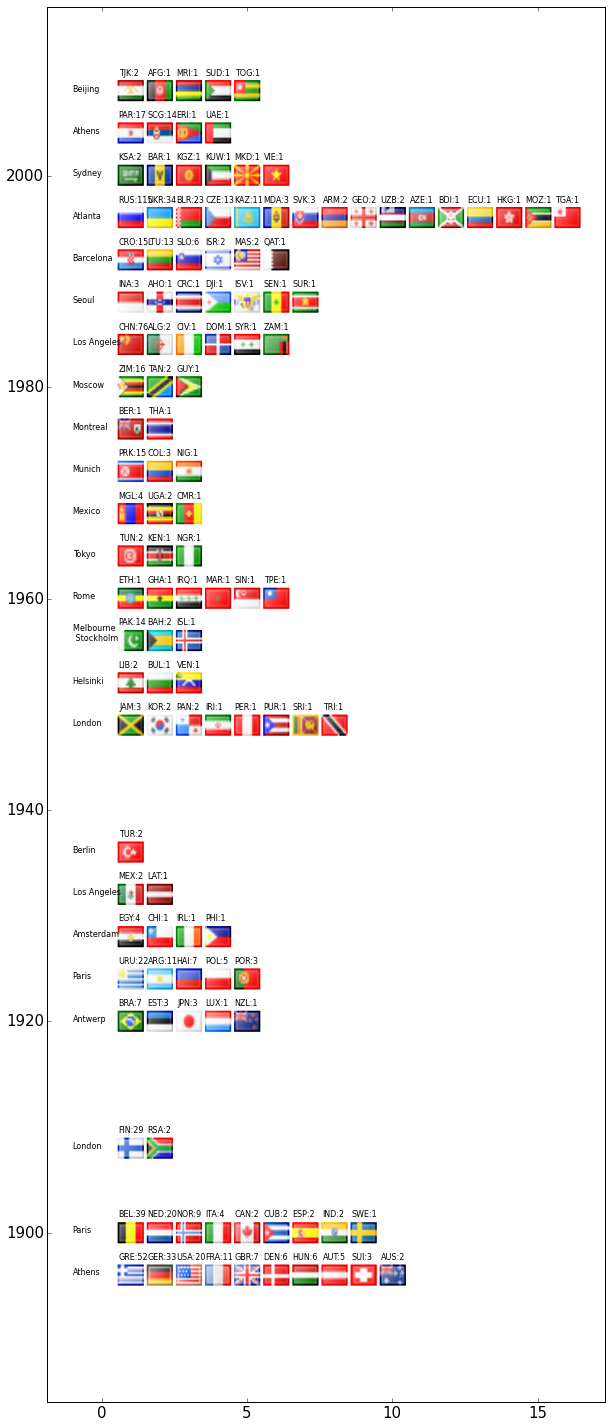

In [437]:
#Flag images from https://github.com/googlei18n/region-flags
b = b.dropna()
fig, ax = plt.subplots()
ax.yaxis.tick_left()
ax.tick_params(axis='y', colors='black', labelsize=15)
ax.tick_params(axis='x', colors='black', labelsize=15)
for year in country_year.Edition.unique():
    tmp_df = b[b.Edition==year]
    tmp_df = tmp_df.sort(columns='Athlete', ascending=False)
    counter = 1
    for index, row in tmp_df.iterrows():
        im = image.imread('famfamfam_flag_icons/png/%s.png' %row['IOC'].lower())
        ax.imshow(im, aspect='auto', extent=(counter-0.45, counter+0.45, year-1, year+1), zorder=+1)
        ax.annotate(row['NOC']+':'+str(row['Athlete']), xy=(counter-0.4, year+1.5), xycoords='data',fontsize=8)
        counter += 1
    ax.annotate(hosts[year], xy=(-1, year), xycoords='data',fontsize=8)
ax.scatter([-1,10],[2010,1890], alpha=0)